# Bonusleistung Paket 2
## Übung 5

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import preprocessing

Ich habe mich für ein Dataset mit Verkaufszahlen von Immobilien aus den USA entschieden. Meine Idee ist den Verkaufspreis eines Hauses vorherzusagen.

In [4]:
# CSV Dateien einlesen
df = pd.read_csv('housePrices.csv').set_index('Id')
df

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500.000000
2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500.000000
3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500.000000
4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000.000000
5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2915,160,RM,21.0,1936,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,6,2006,WD,Normal,167081.220949
2916,160,RM,21.0,1894,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,4,2006,WD,Abnorml,164788.778231
2917,20,RL,160.0,20000,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2006,WD,Abnorml,219222.423400


Analyse der Anzahl der fehlenden Werte:

In [66]:
s = df.isnull().sum()
null_spalten = s[s > 0].head(50)
null_spalten

MSZoning           4
LotFrontage      486
Alley           2721
Utilities          2
Exterior1st        1
Exterior2nd        1
MasVnrType        24
MasVnrArea        23
BsmtQual          81
BsmtCond          82
BsmtExposure      82
BsmtFinType1      79
BsmtFinSF1         1
BsmtFinType2      80
BsmtFinSF2         1
BsmtUnfSF          1
TotalBsmtSF        1
Electrical         1
BsmtFullBath       2
BsmtHalfBath       2
KitchenQual        1
Functional         2
FireplaceQu     1420
GarageType       157
GarageYrBlt      159
GarageFinish     159
GarageCars         1
GarageArea         1
GarageQual       159
GarageCond       159
PoolQC          2909
Fence           2348
MiscFeature     2814
SaleType           1
dtype: int64

Da das Dataset sehr viele fehlende Werte hat, habe ich mich dazu entschieden nur eine geringe Auswahl an Spalten für das Trainieren des Modells heranzuziehen, um die Komplexität etwas herauszunehmen.

In [67]:
from sklearn import preprocessing

dfFilter = df[['BldgType', 'MoSold', 'YrSold', 'LotArea', 'BedroomAbvGr', 'SalePrice']]

dfCopy = dfFilter.copy()
#for name, value in null_spalten.items():
#    dfCopy[name] = dfCopy[name].fillna(dfCopy[name].mode()[0])

dfCopy.head()

,BldgType,MoSold,YrSold,LotArea,BedroomAbvGr,SalePrice
Id,,,,,,
1,1Fam,2,2008,8450,3,208500.0
2,1Fam,5,2007,9600,3,181500.0
3,1Fam,9,2008,11250,3,223500.0
4,1Fam,2,2006,9550,3,140000.0
5,1Fam,12,2008,14260,4,250000.0


## Kodierung relevanter Attribute

In [53]:
labelenc = preprocessing.LabelEncoder()
labelenc.fit(dfCopy.BldgType)
dfCopy['BldgType'] = labelenc.transform(dfCopy.BldgType)

dfCopy.head()

,BldgType,MoSold,YrSold,LotArea,BedroomAbvGr,SalePrice
Id,,,,,,
1,0,2,2008,8450,3,208500.0
2,0,5,2007,9600,3,181500.0
3,0,9,2008,11250,3,223500.0
4,0,2,2006,9550,3,140000.0
5,0,12,2008,14260,4,250000.0


## k-fold Cross-Validation mit drei Algorithmen

In [55]:
from sklearn.model_selection import cross_val_predict, cross_validate
import sklearn.metrics as metrics

x = dfCopy.drop(['SalePrice'], axis = 1)
y = dfCopy['SalePrice'].astype(int)

#### Decision Tree Regressor


In [56]:
from sklearn.tree import DecisionTreeRegressor
XYregressor = DecisionTreeRegressor(random_state=0)

y_pred = cross_val_predict(XYregressor, x,y,cv=10)

Metriken für die Auswertung:

In [57]:
mae = metrics.mean_absolute_error(y, y_pred)
mse = metrics.mean_squared_error(y, y_pred)
rmse = np.sqrt(mse)  
r2 = metrics.r2_score(y,y_pred)

print("Ergebnisse von sklearn.metrics:\n")
print("R-Squared:", r2)
print()

print("MAE:",mae)
print("MSE:", mse)
print("RMSE:", rmse)

Ergebnisse von sklearn.metrics:

R-Squared: -0.9382274022989501

MAE: 51576.81740322028
MSE: 6379707832.50531
RMSE: 79873.07326317993


#### Random Forest Regressor

In [58]:
from sklearn.ensemble import RandomForestRegressor
XYregressor = RandomForestRegressor(max_depth=2, random_state=0)

y_pred = cross_val_predict(XYregressor, x,y,cv=10)

In [59]:
mae = metrics.mean_absolute_error(y, y_pred)
mse = metrics.mean_squared_error(y, y_pred)
rmse = np.sqrt(mse)  
r2 = metrics.r2_score(y,y_pred)

print("Ergebnisse von sklearn.metrics:\n")
print("R-Squared:", r2)
print()

print("MAE:",mae)
print("MSE:", mse)
print("RMSE:", rmse)

Ergebnisse von sklearn.metrics:

R-Squared: 0.16035253444657527

MAE: 33125.38384165557
MSE: 2763713641.7433662
RMSE: 52571.03424646852


#### Gradient Boost Trees (Regression)

In [60]:
from sklearn.ensemble import GradientBoostingRegressor
XYregressor = GradientBoostingRegressor(random_state=0)

y_pred = cross_val_predict(XYregressor, x,y,cv=10)

In [61]:
mae = metrics.mean_absolute_error(y, y_pred)
mse = metrics.mean_squared_error(y, y_pred)
rmse = np.sqrt(mse)  
r2 = metrics.r2_score(y,y_pred)

print("Ergebnisse von sklearn.metrics:\n")
print("R-Squared:", r2)
print()

print("MAE:",mae)
print("MSE:", mse)
print("RMSE:", rmse)

Ergebnisse von sklearn.metrics:

R-Squared: 0.15282769712566635

MAE: 34487.168544952714
MSE: 2788481769.33128
RMSE: 52806.07701137512


## Interpretation der Gütekriterien

Leider schneiden alle drei Algorithmen sehr schlecht ab. Das liegt vermutlich zum einen an der schlechten Auswahl des Datasets mit zu geringer Qualität von mir und der Einschränkung auf nur wenige Spalten. 

Dabei schneidet der Decision Tree Regressor sogar so schlecht ab, dass das R2 negativ ist. Am besten ist hier noch der Random Forest Regressor mit 0.16.
Auch die Fehlerwerte sind extrem hoch und daher eignet sich keines der Modelle (und wahrscheinlich auch das Dataset) für eine Vorhersage

## Mehrere Modelle gleichzeitig trainieren und visuell vergleichen
Gehen Sie den Code unten durch und vollziehen Sie die einzelnen Schritte nach. Was sagt Ihnen die Visualisierung?

In [62]:
import time

estimators = [('DT', DecisionTreeRegressor(min_samples_split = 10, min_samples_leaf = 5)),
    ('RF', RandomForestRegressor(min_samples_split = 10, min_samples_leaf = 5, n_estimators = 100)), 
              ('GB', GradientBoostingRegressor(n_estimators = 100, max_depth = 4))]

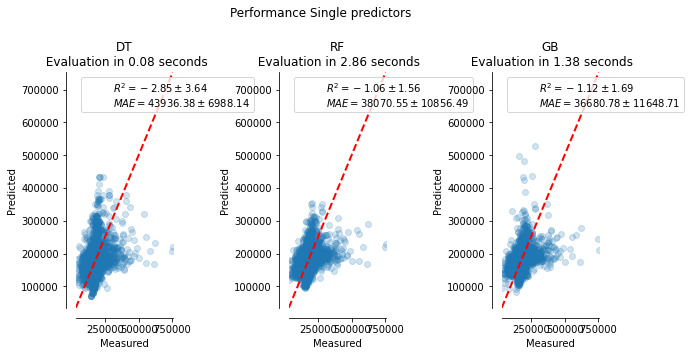

In [63]:
def plot_regression_results(ax, y, y_pred, title, scores, elapsed_time):
    """Scatter plot of the predicted vs true targets."""
    ax.plot([y.min(), y.max()],
            [y.min(), y.max()],
            '--r', linewidth=2)
    ax.scatter(y, y_pred, alpha=0.2)

    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.get_xaxis().tick_bottom()
    ax.get_yaxis().tick_left()
    ax.spines['left'].set_position(('outward', 10))
    ax.spines['bottom'].set_position(('outward', 10))
    ax.set_xlim([y.min(), y.max()])
    ax.set_ylim([y.min(), y.max()])
    ax.set_xlabel('Measured')
    ax.set_ylabel('Predicted')
    extra = plt.Rectangle((0, 0), 0, 0, fc="w", fill=False,
                          edgecolor='none', linewidth=0)
    ax.legend([extra], [scores], loc='upper left')
    title = title + '\n Evaluation in {:.2f} seconds'.format(elapsed_time)
    ax.set_title(title)


fig, axs = plt.subplots(1, 3, figsize=(9, 5))
axs = np.ravel(axs)

for ax, (name, est) in zip(axs, estimators):
    start_time = time.time()
    score = cross_validate(est, x, y,
                           scoring=['r2', 'neg_mean_absolute_error'],
                           n_jobs=-1, verbose=0)
    elapsed_time = time.time() - start_time

    y_pred = cross_val_predict(est, x, y, n_jobs=-1, verbose=0)

    plot_regression_results(
        ax, y, y_pred,
        name,
        (r'$R^2={:.2f} \pm {:.2f}$' + '\n' + r'$MAE={:.2f} \pm {:.2f}$')
        .format(np.mean(score['test_r2']),
                np.std(score['test_r2']),
                -np.mean(score['test_neg_mean_absolute_error']),
                np.std(score['test_neg_mean_absolute_error'])),
        elapsed_time)

plt.suptitle('Performance Single predictors')
plt.tight_layout()
plt.subplots_adjust(top=0.8)
plt.show()

## Fazit:

Leider hat in dieser Übung nicht alles wie geplant funktioniert. Ich dachte eigentlich ich hätte ein geeignetes und interessantes Dataset herausgesucht, aber dann ist mir aufgefallen, dass dieses sehr viele fehlende Werte aufweist, die ich nicht bzw. nur mit sehr viel Aufwand hätte korrigieren können.    
Dadurch, dass ich dann nur wenige Spalten zum trainieren des Modells genutzt habe konnten diese nur schlecht bzw. überhaupt garnicht performen.    
Der Decision Tree Regressor performt sogar so schlecht, dass das Bestimmtheitsmaß R2 negativ ist und damit schlechter Vorhersagen trifft als eine horizontale Linie.    
Daher denke ich, dass es garnicht das schwierige ist einen ML Algorithmus anzuwenden, sondern die größte Schwierigkeit darin besteht ein geeignetes Dataset zu finden und vorzubereiten bzw. zu bereinigen, sowie den richtigen Algorithmus für das gewünschte Ergebnis auszuwählen.